# Proyecto No 1

##### Paso 1

importar librerias y data

In [1]:
# Importar liberrias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Cargar datos

data = pd.DataFrame(
    np.load("proyecto_training_data.npy"),
    columns=[
        "SalePrice",
        "OverallQual",
        "1stFlrSF",
        "TotRmsAbvGrd",
        "YearBuilt",
        "LotFrontage",
    ],
)

##### Paso 2

Dividir data en partes de entrenamiento (train) y prueba (test) de variables que màs adelante se comprueba que son las mejores

In [3]:
quality = data['OverallQual']
price = data['SalePrice']
quality_train, quality_test, price_train, price_test = train_test_split(quality, price, test_size=0.2, random_state=23)

In [4]:
size = data['1stFlrSF']
price2 = data['SalePrice']
size_train, size_test, price2_train, price2_test = train_test_split(size, price2, test_size=0.2, random_state=23)

##### Paso 3

obtener valores descriptivos de los datos

In [5]:
# calcucular media de variables en dataset

media_data = data.mean(axis=0)

media_data


SalePrice       180921.195890
OverallQual          6.099315
1stFlrSF          1162.626712
TotRmsAbvGrd         6.517808
YearBuilt         1971.267808
LotFrontage         70.049958
dtype: float64

In [6]:
# calcucular valor maximo de variables en dataset

max_data = data.max(axis=0)

max_data

SalePrice       755000.0
OverallQual         10.0
1stFlrSF          4692.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

In [7]:
# calcucular valor minimo de variables en dataset

min_data = data.min(axis=0)

min_data

SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1872.0
LotFrontage        21.0
dtype: float64

In [8]:
# calcucular rango de variables en dataset

rango_data = max_data - min_data

rango_data

SalePrice       720100.0
OverallQual          9.0
1stFlrSF          4358.0
TotRmsAbvGrd        12.0
YearBuilt          138.0
LotFrontage        292.0
dtype: float64

In [9]:
# calcucular desviacion estandar de variables en dataset

desviacion_data = data.std(axis=0)

desviacion_data

SalePrice       79442.502883
OverallQual         1.382997
1stFlrSF          386.587738
TotRmsAbvGrd        1.625393
YearBuilt          30.202904
LotFrontage        24.284752
dtype: float64

##### Paso 4

Graficar datos

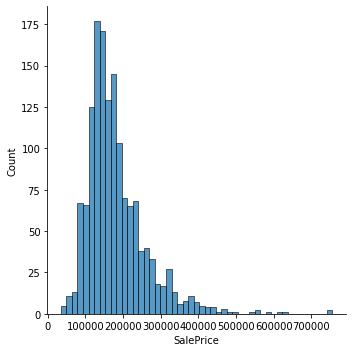

In [10]:
# graficar el precio de venta

seaborn.displot(data=data, x="SalePrice")

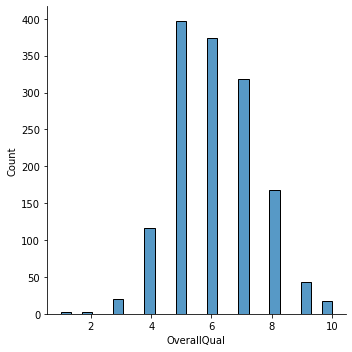

In [11]:
# graficar la calidad general

seaborn.displot(data=data, x="OverallQual")

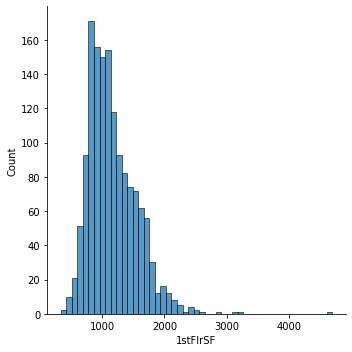

In [12]:
# graficar pies cuadrados del primer piso

seaborn.displot(data=data, x="1stFlrSF")

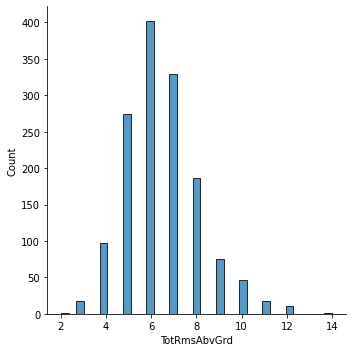

In [13]:
# graficar cuartos totales

seaborn.displot(data=data, x="TotRmsAbvGrd")

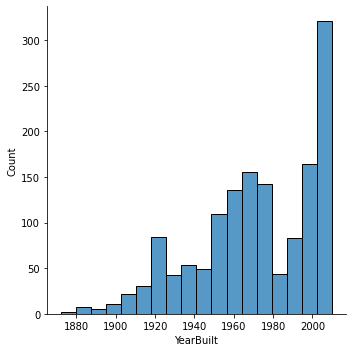

In [14]:
# graficar el año de construccion

seaborn.displot(data=data, x="YearBuilt")

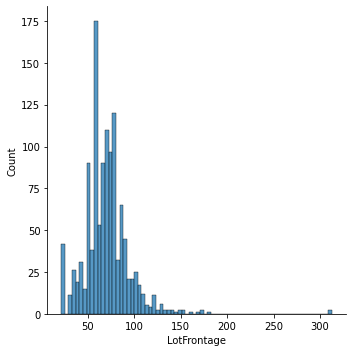

In [15]:
# graficar la cantidad de calle conectada a la propiedad

seaborn.displot(data=data, x="LotFrontage")

##### Paso 5

calcular coeficientes de correlacion

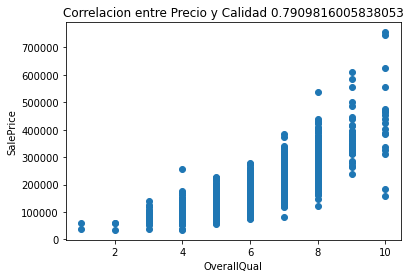

In [16]:
correlacion_precio_calidad = data["SalePrice"].corr(data["OverallQual"])

plt.scatter(data["OverallQual"], data["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Correlacion entre Precio y Calidad " + str(correlacion_precio_calidad))
plt.show()

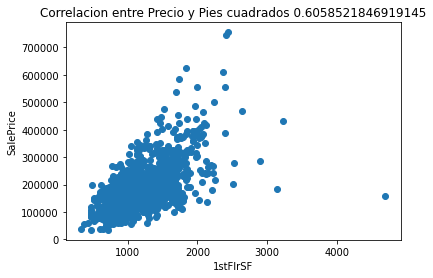

In [17]:
correlacion_precio_pies_cuadrados = data["SalePrice"].corr(data["1stFlrSF"])

plt.scatter(data["1stFlrSF"], data["SalePrice"])
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.title("Correlacion entre Precio y Pies cuadrados " + str(correlacion_precio_pies_cuadrados))
plt.show()

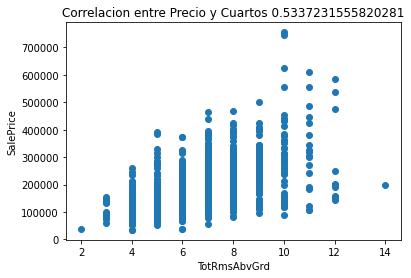

In [18]:
correlacion_precio_cuatos = data["SalePrice"].corr(data["TotRmsAbvGrd"])

plt.scatter(data["TotRmsAbvGrd"], data["SalePrice"])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.title("Correlacion entre Precio y Cuartos " + str(correlacion_precio_cuatos))
plt.show()

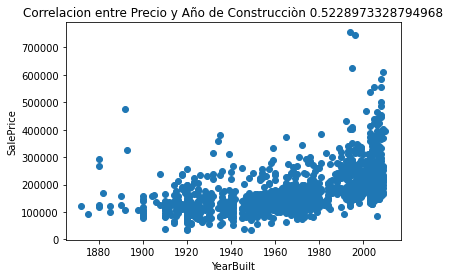

In [19]:
correlacion_precio_anio_construccion = data["SalePrice"].corr(data["YearBuilt"])

plt.scatter(data["YearBuilt"], data["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.title("Correlacion entre Precio y Año de Construcciòn " + str(correlacion_precio_anio_construccion))
plt.show()

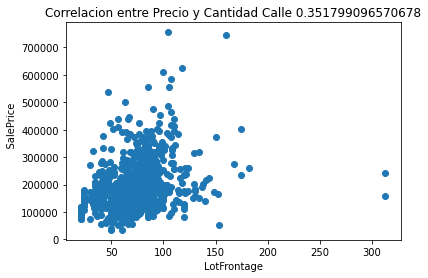

In [20]:
correlacion_precio_cantidad_calle = data["SalePrice"].corr(data["LotFrontage"])

plt.scatter(data["LotFrontage"], data["SalePrice"])
plt.xlabel("LotFrontage")
plt.ylabel("    SalePrice")
plt.title("Correlacion entre Precio y Cantidad Calle " + str(correlacion_precio_cantidad_calle))
plt.show()

Las dos variables con màs relaciòn con el precio son el precio y los pies cuadrados.

##### Paso 6 y 7 Creaciòn de Funciòn

Crear funciòn para entrenar un modelo de regresiòn lineal uni-variable y obtener un modelo predictivo

Crear arrays de varieable dependiente y variables independientes de data de entranamiento y prueba

In [5]:
quality_train = np.array(quality_train)
price_train = np.array(price_train)

quality_test = np.array(quality_test)
price_test = np.array(price_test)

In [6]:
size_train = np.array(size_train)
price2_train = np.array(price2_train)

size_test = np.array(size_test)
price2_test = np.array(price2_test)

In [7]:
Quality_train = np.column_stack((quality_train, np.ones(len(quality_train))))

Quality_test = np.column_stack((quality_test, np.ones(len(quality_test))))


In [8]:
Size_train = np.column_stack((size_train, np.ones(len(size_train))))

Size_test = np.column_stack((size_test, np.ones(len(size_test))))

Funciòn para entrenar modelo creado en clase definida

In [9]:
class regresion_lineal():

    # inicializar constructur
    def __init__(self, iteraciones, imprimir_error_cada, learning_rate):
        self.iteraciones = iteraciones
        self.imprimir_error_cada = imprimir_error_cada
        self.learning_rate = learning_rate
        self.beta0 = 0
        self.beta1 = 0
        self.parametros = np.array([self.beta1, self.beta0])
        self.costos = {}
        self.modelo = {}

    # metodo 1: entrenar modelo
    def entrenar_modelo(self, X, Y):
        n = len(X)
        for iteracion in range(self.iteraciones):
            predicciones = np.dot(X, self.parametros)
            costo = np.array(np.sum((Y - predicciones)**2) / (2 * n))
            self.costos[iteracion] = costo
            gradientes = np.sum(np.stack(((predicciones - Y), (predicciones - Y)), axis=1) * X, axis=0) / n
            self.parametros = self.parametros - self.learning_rate * gradientes
            self.modelo[iteracion] = self.parametros
            if iteracion % self.imprimir_error_cada == 0:
                print("iteracion: {}, Costo: {}".format(iteracion, costo))
        return self.costos, self.modelo
        
    # metodo 2: graficar error
    def grafica_error(self, N, eje_x="", eje_y="", titulo=""):
        for iter, (key, value) in enumerate(self.costos.items()):
            if iter % N == 0:
                plt.bar(key, value)
        plt.xlabel(eje_x)
        plt.ylabel(eje_y)
        plt.title(titulo)
        plt.show()

    # metodo 3: graficar modelo
    def grafica_modelo(self, X, Y, N, eje_x="", eje_y="", titulo=""):
        for iter in self.modelo.keys():
            if iter % N == 0:
                y_pred = np.dot(X, self.modelo[iter])
                plt.scatter(X[:,0], Y, color="gray")
                plt.plot(X[:,0], y_pred)
        plt.xlabel(eje_x)
        plt.ylabel(eje_y)
        plt.title(titulo)
        plt.show()

    # metodo 4: calcular predicciones de ambos modelos y el promedio
    def predicciones_modelos(self, X, Y):
        y_pred_modelo_manual = np.dot(X, self.modelo[list(self.modelo)[-1]])
        y_pred_modelo_scikit = LinearRegression().fit(X[:,0].reshape(-1,1), Y).predict(X[:,0].reshape(-1,1))
        y_pred_promedio = (y_pred_modelo_manual + y_pred_modelo_scikit) / 2
        return y_pred_modelo_manual, y_pred_modelo_scikit, y_pred_promedio
    
    # metodo 5: para la data de prueba calcular las predicciones, el error y graficarlo
    def calcular_error_modelos(self, X_test, Y_test):
        y_pred_modelo_manual = np.dot(X_test, self.modelo[list(self.modelo)[-1]])
        y_pred_modelo_scikit = LinearRegression().fit(X_test[:,0].reshape(-1,1), Y_test).predict(X_test[:,0].reshape(-1,1))
        N=len(X_test)
        costo_manual = np.array(np.sum((Y_test - y_pred_modelo_manual)**2) / (2 * N))
        costo_scikit = np.array(np.sum((Y_test - y_pred_modelo_scikit)**2) / (2 * N))
        plt.scatter(X_test[:,0].reshape(-1,1), Y_test, color="gray")
        plt.plot(X_test[:,0].reshape(-1,1), y_pred_modelo_manual, label="Modelo manual", color='red')
        plt.plot(X_test[:,0].reshape(-1,1), y_pred_modelo_scikit, label="Modelo SciKit",color='blue')
        plt.title("Costo modelo manual {} & costo modelo Scikit {}".format(costo_manual, costo_scikit))
        plt.legend()
        plt.show()


Llamar metètodos para ejecutar los pasos de la funciòn en la data de variable X 1 

In [110]:
reg = regresion_lineal(100000,1000,0.01)

In [111]:
reg.entrenar_modelo(Quality_train, price_train)

iteracion: 0, Costo: 19894105574.063354
iteracion: 1000, Costo: 1346431907.3936458
iteracion: 2000, Costo: 1280014017.2248373
iteracion: 3000, Costo: 1254277425.6704712
iteracion: 4000, Costo: 1244304628.5347483
iteracion: 5000, Costo: 1240440220.8294702
iteracion: 6000, Costo: 1238942782.677528
iteracion: 7000, Costo: 1238362533.0791664
iteracion: 8000, Costo: 1238137689.3378994
iteracion: 9000, Costo: 1238050563.542156
iteracion: 10000, Costo: 1238016802.7434738
iteracion: 11000, Costo: 1238003720.60726
iteracion: 12000, Costo: 1237998651.3466203
iteracion: 13000, Costo: 1237996687.03414
iteracion: 14000, Costo: 1237995925.8731358
iteracion: 15000, Costo: 1237995630.927153
iteracion: 16000, Costo: 1237995516.6370988
iteracion: 17000, Costo: 1237995472.3502889
iteracion: 18000, Costo: 1237995455.1893778
iteracion: 19000, Costo: 1237995448.5396128
iteracion: 20000, Costo: 1237995445.962863
iteracion: 21000, Costo: 1237995444.9643855
iteracion: 22000, Costo: 1237995444.5774806
iteracion

({0: array(1.98941056e+10),
  1: array(8.08767188e+09),
  2: array(3.86632573e+09),
  3: array(2.3568901e+09),
  4: array(1.81704899e+09),
  5: array(1.62386897e+09),
  6: array(1.55463149e+09),
  7: array(1.52970757e+09),
  8: array(1.52062733e+09),
  9: array(1.51721186e+09),
  10: array(1.51582189e+09),
  11: array(1.51515626e+09),
  12: array(1.51474977e+09),
  13: array(1.51443608e+09),
  14: array(1.51415573e+09),
  15: array(1.51388747e+09),
  16: array(1.51362368e+09),
  17: array(1.51336166e+09),
  18: array(1.51310042e+09),
  19: array(1.51283962e+09),
  20: array(1.51257914e+09),
  21: array(1.51231893e+09),
  22: array(1.51205897e+09),
  23: array(1.51179927e+09),
  24: array(1.51153981e+09),
  25: array(1.5112806e+09),
  26: array(1.51102163e+09),
  27: array(1.51076291e+09),
  28: array(1.51050444e+09),
  29: array(1.5102462e+09),
  30: array(1.50998822e+09),
  31: array(1.50973048e+09),
  32: array(1.50947298e+09),
  33: array(1.50921573e+09),
  34: array(1.50895872e+09)

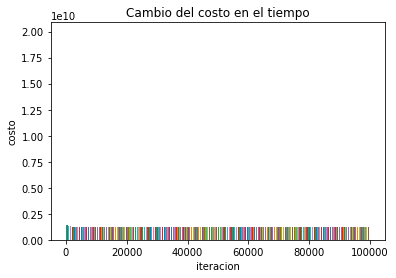

In [113]:
reg.grafica_error(1, "iteracion", "costo", "Cambio del costo en el tiempo")

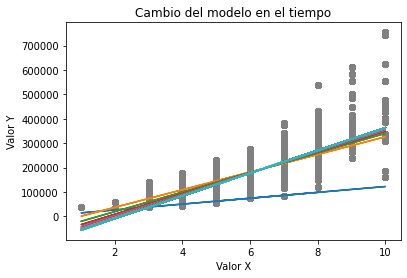

In [114]:
reg.grafica_modelo(Quality_train, price_train, 1000, "Valor X", "Valor Y", "Cambio del modelo en el tiempo")

In [115]:
reg.predicciones_modelos(Quality_train, price_train)

(array([130334.71419548, 270167.14983419, 130334.71419548, ...,
        130334.71419548, 223556.33795462, 270167.14983419]),
 array([130334.71419547, 270167.14983419, 130334.71419547, ...,
        130334.71419547, 223556.33795462, 270167.14983419]),
 array([130334.71419548, 270167.14983419, 130334.71419548, ...,
        130334.71419548, 223556.33795462, 270167.14983419]))

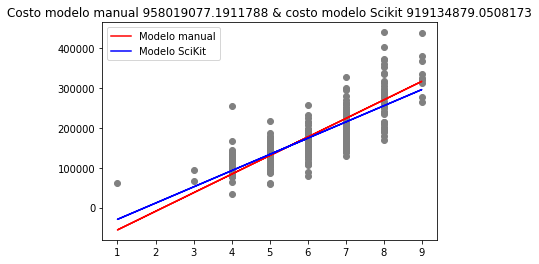

In [116]:
reg.calcular_error_modelos(Quality_test, price_test)

El mejor modelo en esta variable es el de Scikit Learn, con el costo màs bajo, aunque ambos modelos tienen un comportamiento muy similar al graficarlos.

Llamar metètodos para ejecutar los pasos de la funciòn en la data de variable X 2

Crear arrays de varieable dependiente y variables independientes de data de entranamiento y prueba

In [15]:
reg2 = regresion_lineal(100000,5000,0.000001)

In [16]:
reg2.entrenar_modelo(Size_train, price2_train)

iteracion: 0, Costo: 19894105574.063354
iteracion: 5000, Costo: 2193125691.418759
iteracion: 10000, Costo: 2193038789.009526
iteracion: 15000, Costo: 2192951978.1543245
iteracion: 20000, Costo: 2192865258.756702
iteracion: 25000, Costo: 2192778630.7203035
iteracion: 30000, Costo: 2192692093.9488783
iteracion: 35000, Costo: 2192605648.3462763
iteracion: 40000, Costo: 2192519293.8164487
iteracion: 45000, Costo: 2192433030.2634478
iteracion: 50000, Costo: 2192346857.591427
iteracion: 55000, Costo: 2192260775.70464
iteracion: 60000, Costo: 2192174784.507444
iteracion: 65000, Costo: 2192088883.9042926
iteracion: 70000, Costo: 2192003073.799745
iteracion: 75000, Costo: 2191917354.098457
iteracion: 80000, Costo: 2191831724.7051864
iteracion: 85000, Costo: 2191746185.5247912
iteracion: 90000, Costo: 2191660736.462231
iteracion: 95000, Costo: 2191575377.4225626


({0: array(1.98941056e+10),
  1: array(6.86499e+09),
  2: array(3.42622974e+09),
  3: array(2.51864149e+09),
  4: array(2.2791027e+09),
  5: array(2.21588147e+09),
  6: array(2.19919555e+09),
  7: array(2.19479164e+09),
  8: array(2.19362931e+09),
  9: array(2.19332253e+09),
  10: array(2.19324154e+09),
  11: array(2.19322016e+09),
  12: array(2.1932145e+09),
  13: array(2.19321299e+09),
  14: array(2.19321258e+09),
  15: array(2.19321246e+09),
  16: array(2.19321242e+09),
  17: array(2.19321239e+09),
  18: array(2.19321237e+09),
  19: array(2.19321235e+09),
  20: array(2.19321234e+09),
  21: array(2.19321232e+09),
  22: array(2.1932123e+09),
  23: array(2.19321229e+09),
  24: array(2.19321227e+09),
  25: array(2.19321225e+09),
  26: array(2.19321223e+09),
  27: array(2.19321222e+09),
  28: array(2.1932122e+09),
  29: array(2.19321218e+09),
  30: array(2.19321216e+09),
  31: array(2.19321215e+09),
  32: array(2.19321213e+09),
  33: array(2.19321211e+09),
  34: array(2.19321209e+09),
  

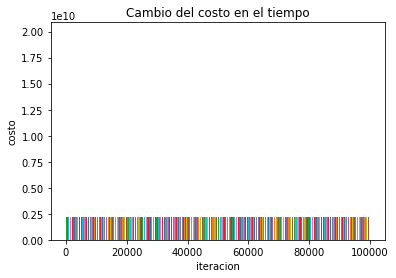

In [17]:
reg2.grafica_error(1, "iteracion", "costo", "Cambio del costo en el tiempo")

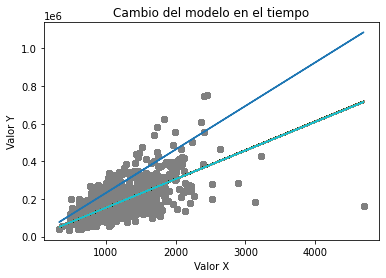

In [13]:
reg2.grafica_modelo(Size_train, price2_train, 100, "Valor X", "Valor Y", "Cambio del modelo en el tiempo")

In [18]:
reg2.predicciones_modelos(Size_train, price2_train)

(array([176220.56604029, 228718.01518632, 162943.59488999, ...,
        176525.78376789, 206284.51220822, 279078.9402392 ]),
 array([180701.14175206, 222840.80000895, 170043.72818128, ...,
        180946.13976518, 204833.44604452, 263265.47217399]),
 array([178460.85389618, 225779.40759764, 166493.66153563, ...,
        178735.96176653, 205558.97912637, 271172.20620659]))

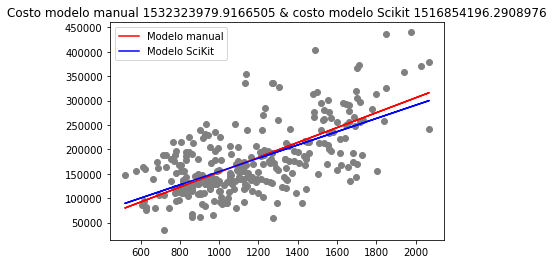

In [19]:
reg2.calcular_error_modelos(Size_test, price2_test)

El mejor modelo es el de Scikit learn, ya que tiene el costo màs bajo, si bien al graficar se ve que ambos dan un valor muy similar